In [1]:
import pandas as pd

## For date and time 

from datetime import datetime

## Let's load the Tesla data from the yahoo site using pdr

In [2]:
df = pd.read_csv("TSLA.csv", index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
## we have data from 2010 t0 2022
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


### Index must be in datetime format to plot graph better 

In [4]:
## there is no null values in it 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7+ KB


In [5]:
### Check for the index 
df.index

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
       '2022-03-18', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24'],
      dtype='object', name='Date', length=2956)

In [6]:
## it's type is object let's convert it into the datetime type 
df.index = pd.to_datetime(df.index)

In [7]:
df.shape

(2956, 6)

<AxesSubplot:xlabel='Date'>

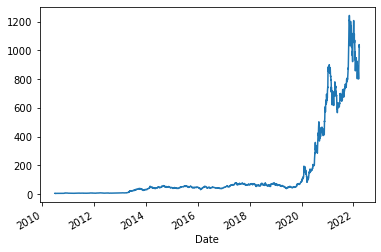

In [8]:
df['High'].plot()

### let's add fig size parameter to view it better 

<AxesSubplot:xlabel='Date'>

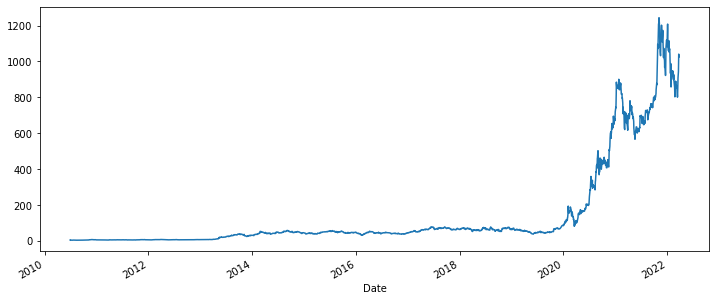

In [9]:
df['High'].plot(figsize = (12,5))

## Here the points in the plots are skewed let's view the limited or specfic time period data 

<AxesSubplot:xlabel='Date'>

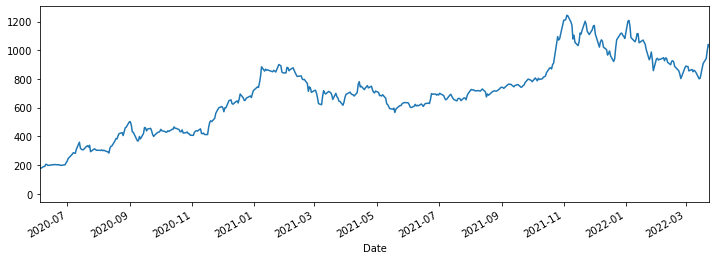

In [10]:
df["High"].plot(xlim = ['2020-06-04', '2022-03-24'], figsize = (12,4))

### In order to view the specific data we can also use the loc fn 
- let's do it with open col 

In [11]:
## this gives us the indexes of the req data 
index = df.loc['2020-01-01':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

## Now let's check for the open col 

In [12]:
open_share = df.loc['2020-01-01':'2021-09-01']['Open']
open_share

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

### Let's plot it 

In [13]:
import matplotlib.pyplot as plt 

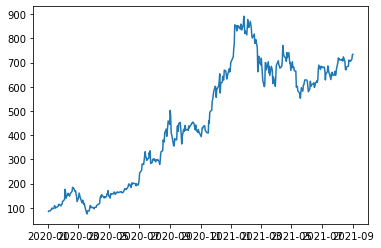

In [14]:
figure, axis = plt.subplots()

## plot takes two arguments 
axis.plot(index, open_share)


#### Here the indexes got overlapped so we use figure.autofmt_xdate() to avoid over lapping 

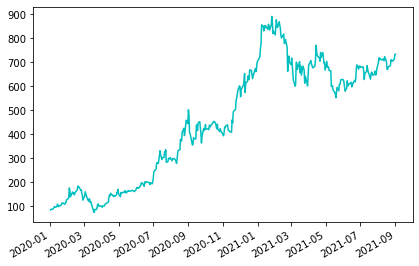

In [15]:
figure, axis = plt.subplots()

plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()

## plot takes two arguments 
axis.plot(index, open_share, 'c')

## Data Resampling 
it is used to get specfic data according to the rule that we provide it 
- In order to apply resampling, index would be in datatime 

In [16]:
df.resample(rule = 'A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,3.228000,3.326000,2.996000,3.160000,3.160000,592500
2011-12-31,4.356000,4.454000,4.222000,4.366000,4.366000,1198000
2012-12-31,5.324000,5.370000,4.528000,4.558000,4.558000,1824500
2013-12-31,6.616000,6.676000,6.422000,6.582000,6.582000,2201000
2014-12-31,28.100000,29.400000,27.334000,27.868000,27.868000,6661000
2015-12-31,37.166000,37.858002,36.279999,37.000000,37.000000,3540000
2016-12-31,28.464001,30.993999,28.209999,28.733999,28.733999,8297500
2017-12-31,42.950001,44.066002,42.192001,43.397999,43.397999,10933500
2018-12-31,50.556000,52.066002,48.917999,50.112000,50.112000,15403500


In [17]:
df['Open'].resample(rule = 'A').min()

Date
2010-12-31      3.228000
2011-12-31      4.356000
2012-12-31      5.324000
2013-12-31      6.616000
2014-12-31     28.100000
2015-12-31     37.166000
2016-12-31     28.464001
2017-12-31     42.950001
2018-12-31     50.556000
2019-12-31     36.220001
2020-12-31     74.940002
2021-12-31    552.549988
2022-12-31    700.390015
Freq: A-DEC, Name: Open, dtype: float64

## Let's plot it 

<AxesSubplot:xlabel='Date'>

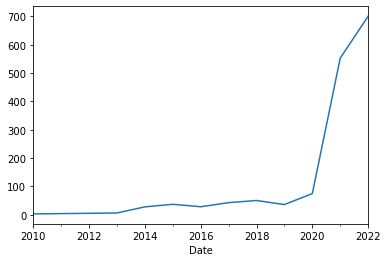

In [18]:
df.resample(rule = 'A').min()['Open'].plot()

## Let's plot the monthly max open stock price 

<AxesSubplot:xlabel='Date'>

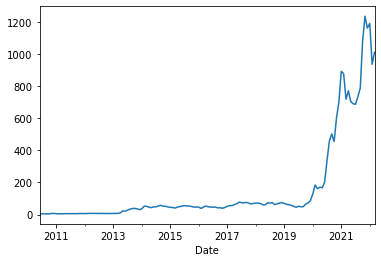

In [19]:
df.resample(rule = 'M').max()['Open'].plot()

## Let's check for each year opening using bar graph 

In [20]:
df.resample(rule = 'M').max()['Open'].tail(50)

Date
2018-02-28      71.250000
2018-03-31      69.001999
2018-04-30      60.720001
2018-05-31      61.540001
2018-06-30      73.031998
2018-07-31      72.014000
2018-08-31      73.818001
2018-09-30      62.580002
2018-10-31      67.494003
2018-11-30      71.267998
2018-12-31      75.000000
2019-01-31      69.241997
2019-02-28      63.917999
2019-03-31      61.388000
2019-04-30      57.660000
2019-05-31      51.360001
2019-06-30      45.743999
2019-07-31      51.834000
2019-08-31      48.529999
2019-09-30      49.540001
2019-10-31      65.508003
2019-11-30      72.000000
2019-12-31      87.000000
2020-01-31     128.000000
2020-02-29     184.699997
2020-03-31     161.000000
2020-04-30     171.037994
2020-05-31     166.899994
2020-06-30     202.556000
2020-07-31     335.790009
2020-08-31     459.023987
2020-09-30     502.140015
2020-10-31     454.440002
2020-11-30     602.210022
2020-12-31     699.989990
2021-01-31     891.380005
2021-02-28     877.020020
2021-03-31     718.280029
2021-04

<AxesSubplot:xlabel='Date'>

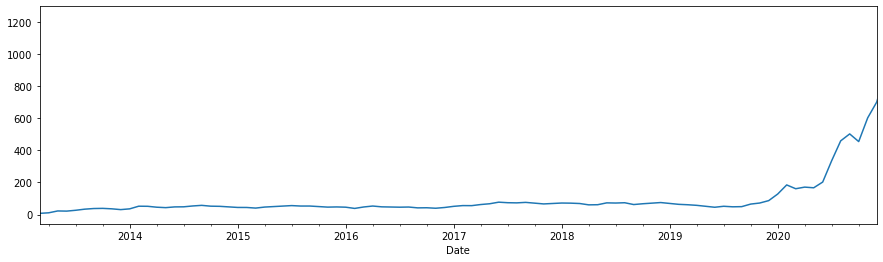

In [21]:
df.resample(rule = 'M').max()['Open'].plot(kind ='line', xlim = ['2013-03-31', '2020-12-31'], figsize = (15,4))

<AxesSubplot:xlabel='Date'>

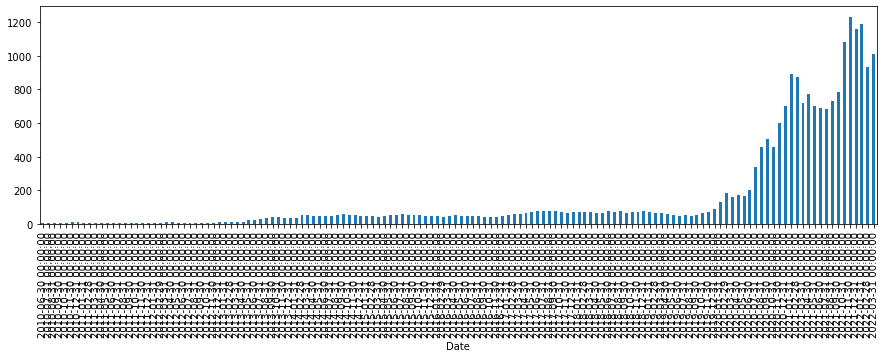

In [22]:
df['Open'].resample(rule = 'M').max().plot(kind ='bar', xlim = ['2013-03-31', '2020-12-31'], figsize = (15,4))

## Rolling
Rolling in time series refers to a method of analyzing data by creating a moving or rolling window of a fixed size and applying a calculation or function to the data within that window.

The rolling method can be used to smooth out fluctuations in the data, identify trends or patterns, and detect anomalies or outliers. It is commonly used in finance, economics, and other fields that deal with time series data.

In [25]:
## first 4 values will be empty bcz it takes the previous 5 values to calculate mean
## but at the first 4 steps we don't have 5 values count 

df['Open:5 rolling'] = df['Open'].rolling(5).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Open:5 rolling
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,NaN
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,NaN
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,NaN
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,4.511600
...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,814.071997
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,840.945996
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,871.891992


## Let's check the plot 

<AxesSubplot:xlabel='Date'>

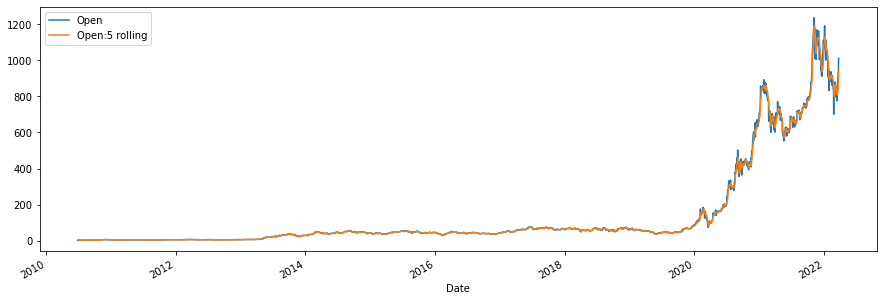

In [27]:
df[['Open', 'Open:5 rolling']].plot(figsize = (15,5))

## Take a large value for window than check the difference 

In [28]:
df['Open:30 rolling'] = df['Open'].rolling(30).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Open:5 rolling,Open:30 rolling
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,NaN,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,NaN,NaN
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,NaN,NaN
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,NaN,NaN
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,4.511600,NaN
...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,814.071997,855.553666
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,840.945996,856.145666
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,871.891992,856.352667


## Here the large value smooth out the line which was high and low at many points 

<AxesSubplot:xlabel='Date'>

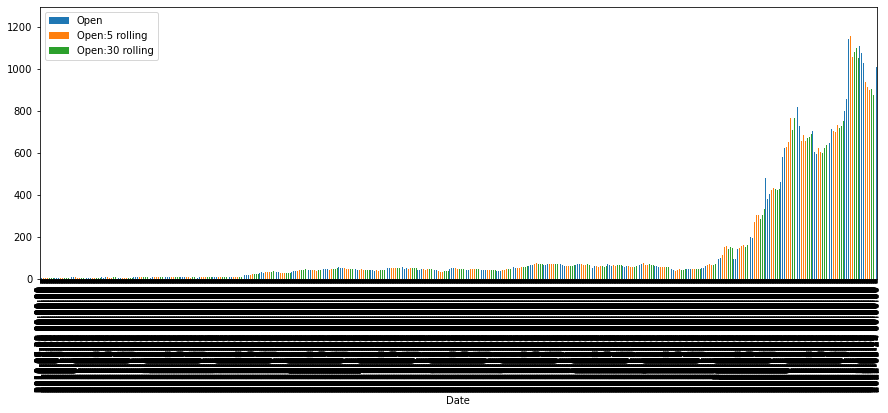

In [32]:
df[['Open', 'Open:5 rolling','Open:30 rolling']].plot(figsize = (15,5),xlim = ['2019-07-06','2022-03-24'], kind = 'bar')